<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/07-03-mnist-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.
# MNIST introduction

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def one_hot(values):
  n_values = np.max(values) + 1
  return np.eye(n_values)[values]

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print('x_train.shape:', x_train.shape, 'y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:', y_test.shape)


x_train.shape: (60000, 28, 28) y_train.shape: (60000,)
x_test.shape: (10000, 28, 28) y_test.shape: (10000,)


In [5]:
x_train[10][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
# preprocess the data (these are numpy arrays)
# tf.keras.utils.to_categorical 도 참고

x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

y_train = one_hot(y_train)
y_test = one_hot(y_test)


In [7]:
print('x_train.shape:', x_train.shape, 'y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:', y_test.shape)

x_train.shape: (60000, 784) y_train.shape: (60000, 10)
x_test.shape: (10000, 784) y_test.shape: (10000, 10)


In [8]:
# reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [9]:
nb_classes = 10 # 0 ~ 9 digit recogniztion
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=784, activation='softmax')) # 28 by 28 (784)
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


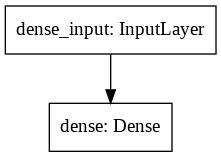

In [10]:
tf.keras.utils.plot_model(tf.model)

In [11]:
history = tf.model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val), verbose=0)

In [12]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tf.model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9231
test loss, test acc: [0.2768342196941376, 0.9230999946594238]


In [13]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = tf.model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 10)


In [15]:
# Get one and predict
r = np.random.randint(0, x_test.shape[0])
print("Label: ", np.argmax(y_test[r]))

pred = tf.model.predict(x_test[r].reshape(-1,784))
print("Prediction: ", np.argmax(pred))



Label:  0
Prediction:  0
